In [2]:
import pandas as pd
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score

In [3]:
dataset=pd.read_csv('Cleaned_Dataset.csv', sep=',')
train=pd.read_csv('train.csv', sep=',')
test=pd.read_csv('test.csv', sep=',')
train_index=train.index
y=dataset['is_pass'].values[:len(train_index)]
X=dataset.drop(['is_pass'], axis=1).values[:len(train_index),:]

In [3]:
dataset_rf=dataset.drop(['is_4','program_range','difficulty_level','rating_given','U_1','S_2','S_1','V_1', 'V_2','U_2','S','V_3','V_4','T_1','T_2','T_3','T_4','X_1','X_2','X_3','Z_1','Z_2','Z_3','Y_1','Y_2','Y_3','Y_4','T', 'U','V','X','Y','Z','age_given','first_attempt','total_programs_enrolled'], axis=1)
y_rf=dataset_rf['is_pass'].values[:len(train_index)]
X_rf=dataset_rf.drop(['is_pass'], axis=1).values[:len(train_index),:]
sc=MinMaxScaler(feature_range=(0,1))
sc.fit_transform(X_rf)

array([[1.        , 0.80213904, 0.4671344 , ..., 1.        , 0.18388252,
        0.        ],
       [0.73684211, 0.23529412, 0.82211275, ..., 1.        , 0.2257347 ,
        0.        ],
       [0.15789474, 0.95187166, 0.69592476, ..., 1.        , 0.51869995,
        1.        ],
       ...,
       [0.15789474, 0.75935829, 0.64994775, ..., 1.        , 0.34772959,
        0.        ],
       [0.73684211, 0.43850267, 0.28193263, ..., 0.        , 0.24666079,
        0.        ],
       [0.21052632, 0.63636364, 0.22222222, ..., 0.        , 0.33036515,
        0.        ]])

In [4]:
rf=RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, max_features=None, warm_start=False, oob_score=False, class_weight='balanced', random_state=0)
rf.fit(X_rf, y_rf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [5]:
print(roc_auc_score(y_rf, rf.predict_proba(X_rf)[:,1:]))

1.0


In [6]:
dataset_lgbm=dataset.drop(['is_4','program_range','difficulty_level','rating_given','U_1','S_2','S_1','V_1', 'V_2','U_2','S','V_3','V_4','T_1','T_2','T_3','T_4','X_1','X_2','X_3','Z_1','Z_2','Z_3','Y_1','Y_2','Y_3','Y_4','T', 'U','V','X','Y','Z','age_given','first_attempt','total_programs_enrolled','age_40'], axis=1)
y_lgbm=dataset_lgbm['is_pass'].values[:len(train_index)]
X_lgbm=dataset_lgbm.drop(['is_pass'], axis=1).values[:len(train_index),:]
sc=MinMaxScaler(feature_range=(0,1))
sc.fit_transform(X_lgbm)

array([[1.        , 0.80213904, 0.4671344 , ..., 1.        , 1.        ,
        0.18388252],
       [0.73684211, 0.23529412, 0.82211275, ..., 0.        , 1.        ,
        0.2257347 ],
       [0.15789474, 0.95187166, 0.69592476, ..., 1.        , 1.        ,
        0.51869995],
       ...,
       [0.15789474, 0.75935829, 0.64994775, ..., 1.        , 1.        ,
        0.34772959],
       [0.73684211, 0.43850267, 0.28193263, ..., 0.        , 0.        ,
        0.24666079],
       [0.21052632, 0.63636364, 0.22222222, ..., 1.        , 0.        ,
        0.33036515]])

In [7]:
train_data = lgb.Dataset(X_lgbm, label=y_lgbm)

In [8]:
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'verbose': 1,
    'learning_rate': 0.04,
    'n_estimators':600,
    'num_leaves': 1200,
    'random_state': 0,
    'colsample_bytree':0.4,
    'lambda':1.7,
    'min_data_in_leaf':10
    
}

In [9]:
model = lgb.train(parameters,
                       train_data,
                       num_boost_round=1000
                        )

c:\users\anirudh prakash\appdata\local\programs\python\python35\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


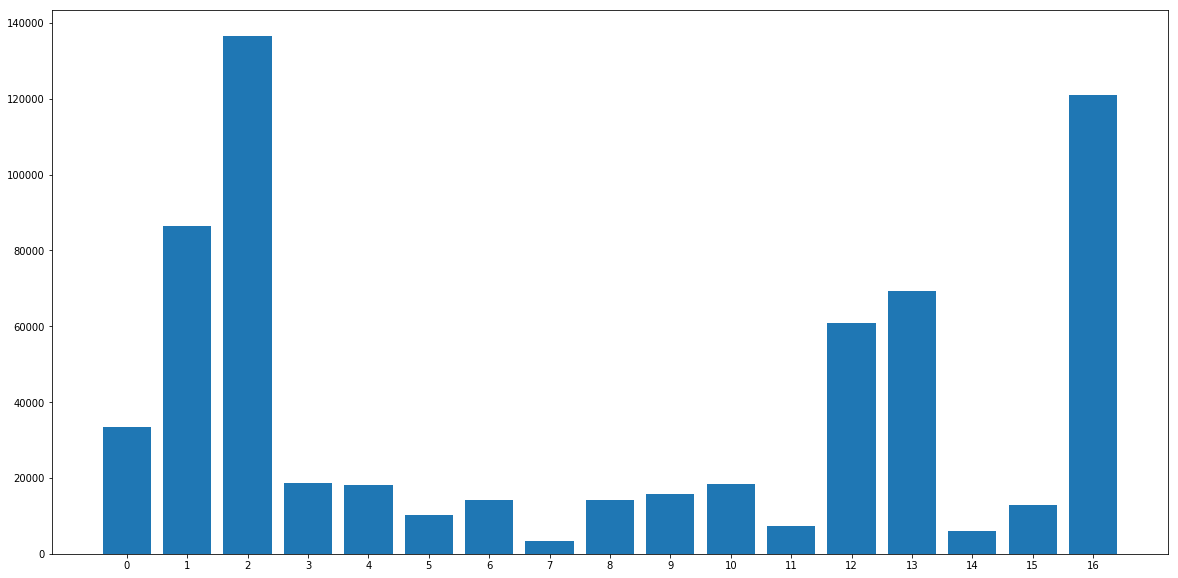

In [10]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.bar(range(len(model.feature_importance())), model.feature_importance())
pyplot.xticks(range(len(model.feature_importance())))
pyplot.show()

In [11]:
dataset_xgb=dataset.drop(['age_given','first_attempt','U_1','S_2','program_range','total_programs_enrolled','S_1', 'V_1','V_2','U_2','S','U','V_3','V_4','T_1', 'is_4', 'V', 'difficulty_level', 'rating_given','3'], axis=1) 
y_xgb=dataset_xgb['is_pass'].values[:len(train_index)]
X_xgb=dataset_xgb.drop(['is_pass'], axis=1).values[:len(train_index),:]
sc=MinMaxScaler(feature_range=(0,1))
sc.fit_transform(X_xgb)

array([[1.        , 0.80213904, 0.4671344 , ..., 1.        , 0.18388252,
        0.        ],
       [0.73684211, 0.23529412, 0.82211275, ..., 1.        , 0.2257347 ,
        0.        ],
       [0.15789474, 0.95187166, 0.69592476, ..., 1.        , 0.51869995,
        1.        ],
       ...,
       [0.15789474, 0.75935829, 0.64994775, ..., 1.        , 0.34772959,
        0.        ],
       [0.73684211, 0.43850267, 0.28193263, ..., 0.        , 0.24666079,
        0.        ],
       [0.21052632, 0.63636364, 0.22222222, ..., 0.        , 0.33036515,
        0.        ]])

In [12]:
dtrain = xgb.DMatrix(X_xgb, label=y_xgb)

In [13]:
param = {
    'max_depth': 60,  
    'objective': 'binary:logistic', 
    'n_estimators': 600,
    'eval_metric':'auc',
    'gamma':4,
    'colsample_bytree':0.35,
    'n_thread':4,
    'silent':0,
    'eta':.1,
    'lambda': 1.7,
    'min_child_weight': 0.05,
    'colsample_bylevel': 0.8
        }  
num_round = 500  

In [14]:
bst = xgb.train(param, dtrain, num_round)

In [15]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_xgb, bst.predict(dtrain)))

0.9524842458872663


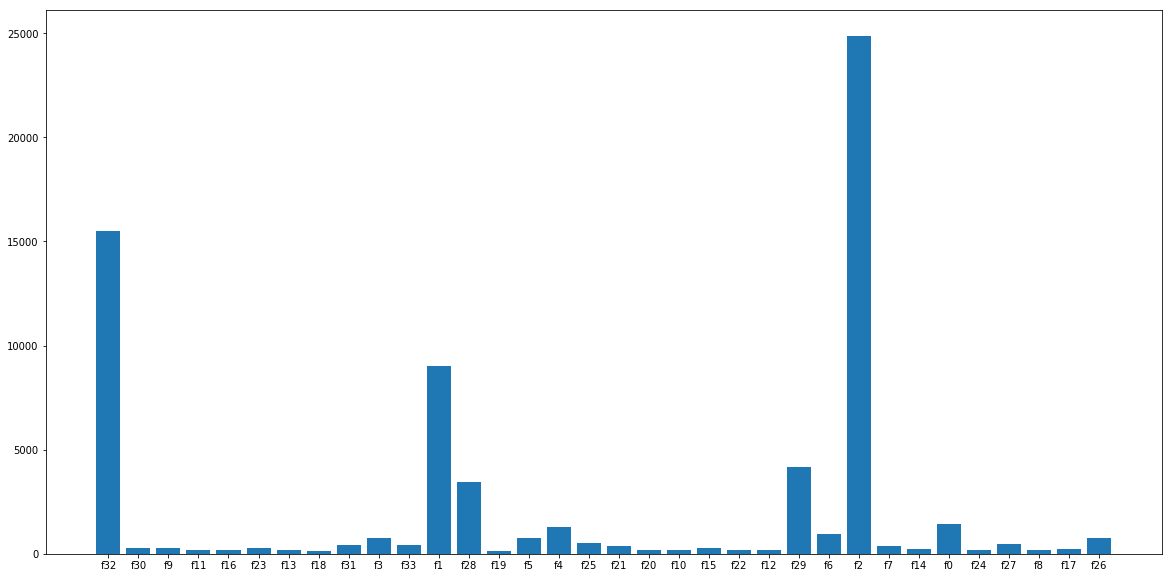

In [16]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.bar(bst.get_score().keys(), bst.get_score().values())
pyplot.xticks(range(len(bst.get_fscore())))
pyplot.show()

In [17]:
X_test_lgbm_final=dataset_lgbm.drop(['is_pass'], axis=1).values[len(train_index):,:]
X_test_xgb_final=dataset_xgb.drop(['is_pass'], axis=1).values[len(train_index):,:]
X_test_rf_final=dataset_rf.drop(['is_pass'], axis=1).values[len(train_index):,:]
y_sample=dataset['is_pass'].values[len(train_index):]
dfinal=xgb.DMatrix(X_test_xgb_final, label=y_sample)

In [18]:
ensemble_test_final = pd.DataFrame()
ensemble_test_final['lgb']=model.predict(X_test_lgbm_final)
ensemble_test_final['xgb']=bst.predict(dfinal)
ensemble_test_final['rf']=rf.predict_proba(X_test_rf_final)[:,1:]

In [19]:
y_pred_final=.37*ensemble_test_final['xgb']+ .44*ensemble_test_final['lgb']+.19*ensemble_test_final['rf']
Submission = pd.DataFrame({ 'id': test['id'],
                            'is_pass':y_pred_final })
Submission.to_csv("Submission.csv", index=False)